# Car Price Prediction

## Problem Statment

## Domain Knowledge

In [1]:
# Importing libraries
# Numpy for array operations and also to do calculations
import numpy as np
# Pandas for load dataset and manipulation of tabular data
import pandas as pd
# For plotting
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
#from IPython.core.pylabtools import figsize
#from datasist.structdata import detect_outliers

# For importing dataset from url
import urllib.request
# To interact with the underlying Operating System
import os
# For numerical computation and ML modeling phase
#import tensorflow as tf
# to manipulate date and time
#from datetime import datetime, timedelta
# Generate words cloud
#from wordcloud import WordCloud
# Import Images to notebook
#from IPython.display import Image
# For statistical analysis
from scipy import stats
# Set warnings to be ignored
import warnings
warnings.filterwarnings("ignore")

In [2]:
def remove_outliers(df, columns, iqr_coefficient=1.5):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - iqr_coefficient * IQR
    upper_fence = Q3 + iqr_coefficient * IQR
    return df[~((df[columns] < lower_fence) | (df[columns] > upper_fence)).any(axis=1)]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Run this code to load data from google drive (if you are on google cloud colab)
df = pd.read_csv('/content/drive/MyDrive/Datasets/autos.csv').drop('index', axis=1)

In [ ]:
# Run this code to load data from local machine (if you are using local machine)
#df = pd.read_csv('autos.csv').drop('index', axis=1)

In [6]:
# Read 1st 5 rows
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
# Read data dimensions
df.shape

(371528, 20)

In [8]:
# Get information analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

## Data Understanding:

1. `dateCrawled` : the date the ad was first seen (Date).
2. `name`: name of the car (String).
3. `seller`: type (private or dealer) (String).
4. `offerType`: Type of offer (e.g. sale, repair, etc.) (String).
5. `price`: Target variable (Integer).
6. `abtest`: A/B testing information (String).
7. `vehicleType`: type of vehicle (String).
8. `yearOfRegistration`: year at which the car was first registered (String).
9. `gearbox`: type of gear (String).
10. `powerPS`: output in PS (horsepower) (Integer).
11. `model`: model of car (String).
12. `kilometer`: howmany kilometers has it driven so far (Integer).
13. `monthOfRegistration`: (when it was first registered)(essentially giving us an idea about its age) (Integer).
14. `fuelType`: fuel used (petrol/diesel /electricity/lpg etc.) (String).
15. `brand`: name to which it belongs to (String).
16. `notRepairedDamage`: if there is any damage on the vehicle that has not been repaired yet (String).
17. `DateCreated`: gives us information when this particular advertisement was created in ebay or other place where these cars can be posted (Date).
18. `nrOfPictures`: field will give you an estimate regarding how many images have been included with this ad (Integer).
19. `postalCode`: contain info regarding area code where car have been posted (Integer).
20. `lastSeen`: give us time estimation when a crawler last scan this particular post online (Date).

In [9]:
# Get Statistical Analysis
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [10]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

## Data Cleansing

### Drop irrelevant columns

- Intially We will not need the following features in our analysis and prediction model: `name`, `abtest`, `noOfPictures`, `postalCode`.

In [11]:
df = df.drop(['name','abtest','nrOfPictures','postalCode'], axis=1)

### Check Missing Value

In [12]:
# missing values by each column
df.isnull().sum()

dateCrawled                0
seller                     0
offerType                  0
price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
lastSeen                   0
dtype: int64

In [ ]:
# percentage of missing data
round(df.isnull().sum()/df.shape[0] * 100, 2)

seller                  0.00
offerType               0.00
price                   0.00
vehicleType            10.19
yearOfRegistration      0.00
gearbox                 5.44
powerPS                 0.00
model                   5.51
kilometer               0.00
monthOfRegistration     0.00
fuelType                8.99
brand                   0.00
notRepairedDamage      19.40
dtype: float64

- We can replace the missing value with the right/exact values by:
1. The `vehicleType`,`gearbox`,`fuelType` by checking the `model` and the `brand`and checking the manufacture manual.
2. model names `model` from the ad `name`.
3. As for `notRepairedDamage` we will not be able to recover it exactly but can be deducaed by price estimate (based on an assumptions that same model cars that are not damaged have higher car price than damaged/not repaired cars).

- For sake of project time, We will do our analysis and build our model without the missing data.

In [16]:
# drop all missing values
df_dropna = df.dropna()

In [17]:
df.shape

(371528, 16)

### Check for duplicates

In [18]:
# Check for duplicated values
df_dropna.duplicated().sum()

5

In [19]:
# Remove duplicated values
df_dropna_dropdup = df_dropna.drop_duplicates()

In [21]:
# Check data after removing missing data and duplicates
df_dropna_dropdup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260951 entries, 3 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          260951 non-null  object
 1   seller               260951 non-null  object
 2   offerType            260951 non-null  object
 3   price                260951 non-null  int64 
 4   vehicleType          260951 non-null  object
 5   yearOfRegistration   260951 non-null  int64 
 6   gearbox              260951 non-null  object
 7   powerPS              260951 non-null  int64 
 8   model                260951 non-null  object
 9   kilometer            260951 non-null  int64 
 10  monthOfRegistration  260951 non-null  int64 
 11  fuelType             260951 non-null  object
 12  brand                260951 non-null  object
 13  notRepairedDamage    260951 non-null  object
 14  dateCreated          260951 non-null  object
 15  lastSeen             260951 non-nu

### Remove Outliers for Numerical Data

In [23]:
df.select_dtypes(include='number').columns.tolist()

['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']

- Our numerical features are: `price`, `yearOfRegistration`, `powerPS`, `kilometer`, `monthOfRegistration`.

#### Price

In [26]:
# Target `Price` statistical description
pd.set_option('float_format', '{:f}'.format) # see full decimal number
df_dropna_dropdup["price"].describe()

count     260951.000000
mean        8208.710486
std       343312.378004
min            0.000000
25%         1500.000000
50%         3850.000000
75%         8600.000000
max     99999999.000000
Name: price, dtype: float64

In [28]:
# Ads with prices that over 1.5 milion
print(df_dropna_dropdup[df_dropna_dropdup['price'] > 1500000].shape)
# Ads with prices that is equal to zero
print(df_dropna_dropdup[df_dropna_dropdup['price'] ==0].shape)
# Ads with prices that is less than $ 100
print(df_dropna_dropdup[df_dropna_dropdup['price'] <= 100].shape)
# Ads with prices more than 100 and less than the 1st quartile 25%
print(df_dropna_dropdup[(df_dropna_dropdup['price'] >100) & (df_dropna_dropdup['price']<1500)].shape)
# Ads with price less than $1000
print(df_dropna_dropdup[df_dropna_dropdup['price'] < 1000].shape)

(10, 16)
(3389, 16)
(4348, 16)
(57927, 16)
(41125, 16)


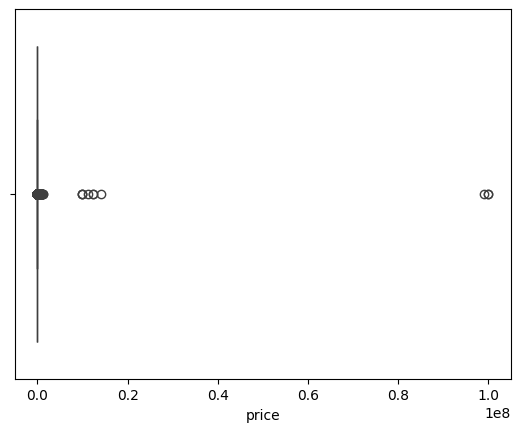

In [29]:
sns.boxplot(x='price', data=df_dropna_dropdup);

- The `mean` is greater than the `median` (`50%` count), our target is `Positively/Right skewed`.
- Any ads price is Zero is redundant data.
- Any ads are less than `$100` can be considered redundant data.
- Ads with prices more than `$1.5M` which are not logical can be considered redundant data.

Assuming the min price for a car is $ 1000

In [30]:
# Drop all rows that contain zeros and ads with price less than 1000
df_zeros= df_dropna_dropdup[(df_dropna_dropdup['price'] > 1000)]


In [31]:
df_zeros['price'].describe()

count     217170.000000
mean        9741.180048
std       376311.685775
min         1001.000000
25%         2500.000000
50%         4999.000000
75%         9990.000000
max     99999999.000000
Name: price, dtype: float64

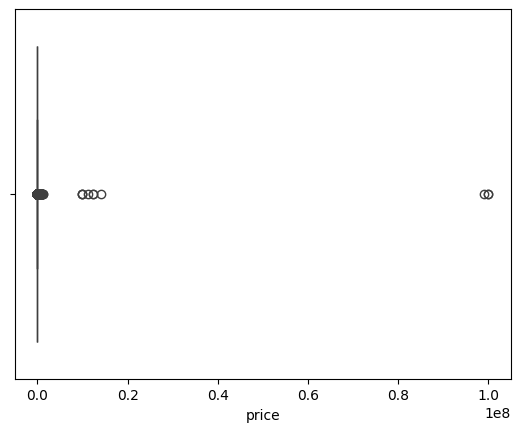

In [32]:
sns.boxplot(x='price', data=df_zeros);

In [33]:
df_no_outliers = remove_outliers( df_zeros, ['price'])

In [34]:
df_no_outliers['price'].describe()

count   203303.000000
mean      6195.856136
std       4783.036510
min       1001.000000
25%       2400.000000
50%       4600.000000
75%       8700.000000
max      21225.000000
Name: price, dtype: float64

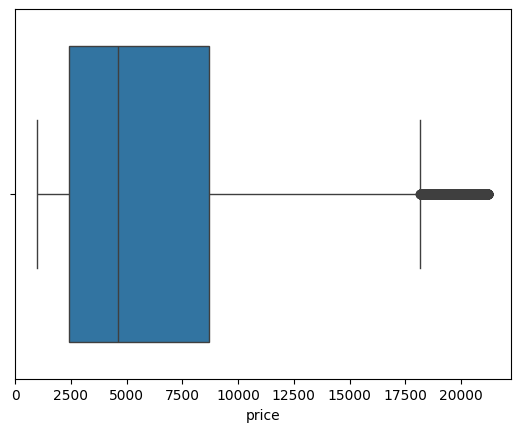

In [35]:
sns.boxplot(x='price', data=df_no_outliers);


In [37]:
# Check for outliers
fig1 = px.histogram(df_no_outliers, x="price", histnorm='probability density',marginal="box")
fig1.show();

In [38]:
df_no_outliers.shape

(203303, 16)

#### yearOfRegistration & monthOfRegistration

In [39]:
df_no_outliers.yearOfRegistration.value_counts()

2006    16316
2005    15358
2004    14880
2007    14260
2003    14139
        ...  
1934        1
1929        1
1931        1
1930        1
1947        1
Name: yearOfRegistration, Length: 81, dtype: int64

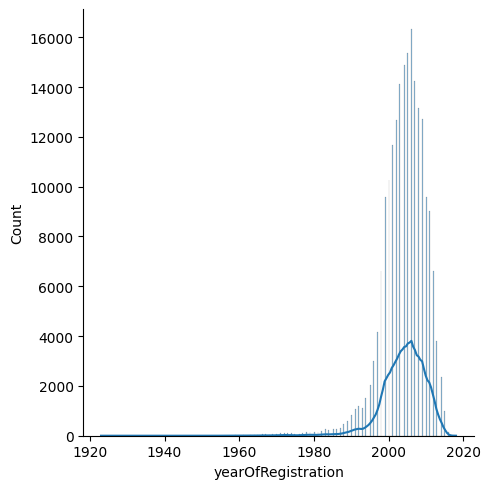

In [42]:
sns.displot(df_no_outliers, x='yearOfRegistration', kde=True);

In [40]:
df_no_outliers.monthOfRegistration.value_counts()

3     21832
6     19623
4     18359
5     18136
7     16878
10    16746
11    15444
9     15391
12    15103
1     14267
8     14240
2     13366
0      3918
Name: monthOfRegistration, dtype: int64

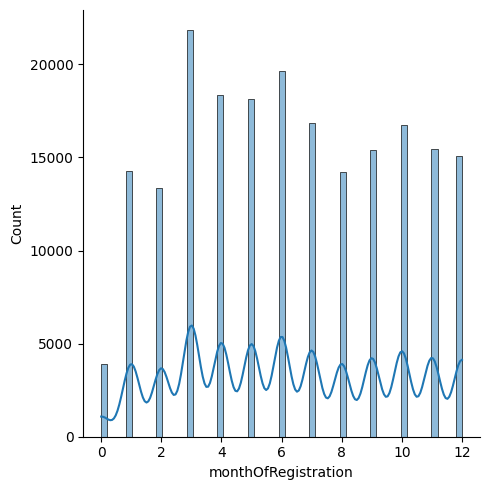

In [43]:
sns.displot(df_no_outliers, x='monthOfRegistration', kde=True);

- both Month and year are consistant and logical to accept to be used.
- we can deduce that car age by subtracting the registration date from the ad date which is an important factor in pricing a car.

#### powerPS

In [61]:
df_no_outliers['powerPS'].describe()

count   203303.000000
mean       128.021392
std        140.400129
min          0.000000
25%         90.000000
50%        120.000000
75%        155.000000
max      20000.000000
Name: powerPS, dtype: float64

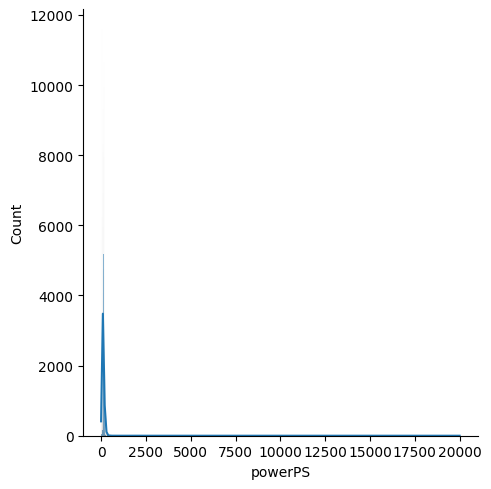

In [45]:
sns.displot(df_no_outliers, x='powerPS', kde=True);

In [52]:
# Check for outliers
fig1 = px.histogram(df_no_outliers, x="powerPS", histnorm='probability density',marginal="box")
fig1.show();

In [55]:
df_no_outliers[df_no_outliers['powerPS'] > 5000].shape

(21, 16)

In [54]:
df_no_outliers[df_no_outliers['powerPS'] < 40].shape

(6061, 16)

- From domain knowledge the min horse power HP or PS is 40 and the max is less than 2000. and exceptional cars can reach 5007 [Link](https://www.copilotsearch.com/posts/what-car-has-the-most-horsepower-what-to-know/)
Therefore, we will remove/replace any data the out of this range.

In [64]:
df_no_outliers[(df_no_outliers['powerPS']>1500)].head()

,dateCrawled,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
20022,2016-03-20 17:54:04,privat,Angebot,9750,kombi,2005,automatik,2729,5er,150000,7,diesel,bmw,nein,2016-03-20 00:00:00,2016-03-23 02:48:53
21261,2016-03-25 18:48:26,privat,Angebot,2000,kombi,2003,manuell,1900,c5,150000,9,diesel,citroen,ja,2016-03-25 00:00:00,2016-04-02 23:19:58
26429,2016-03-28 19:57:39,privat,Angebot,10900,bus,2009,manuell,10520,caddy,150000,6,diesel,volkswagen,nein,2016-03-28 00:00:00,2016-04-07 02:47:02
34342,2016-03-22 14:58:27,privat,Angebot,9500,bus,1986,automatik,1659,andere,40000,12,benzin,chevrolet,nein,2016-03-22 00:00:00,2016-04-07 03:46:46
59735,2016-04-01 21:55:58,privat,Angebot,1995,kombi,2002,manuell,11530,focus,150000,1,benzin,ford,nein,2016-04-01 00:00:00,2016-04-05 14:44:36


- after checking the ads with `powerPS` more than 1500, it's clear that they are wrong input or wrong data, So we will remove them.

In [62]:
df_cleaned = remove_outliers(df_no_outliers, ['powerPS'])

In [65]:
df_cleaned['powerPS'].describe()

count   197717.000000
mean       121.327529
std         49.274865
min          0.000000
25%         87.000000
50%        116.000000
75%        150.000000
max        252.000000
Name: powerPS, dtype: float64

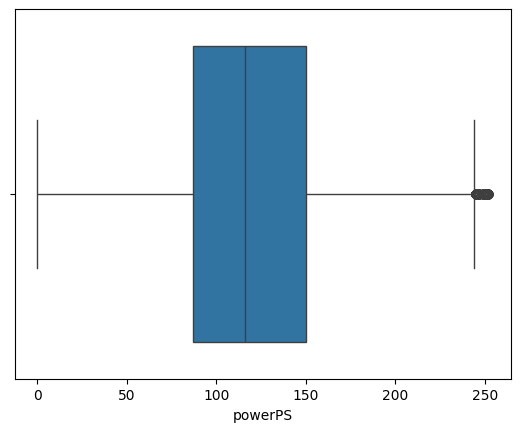

In [63]:
sns.boxplot(x='powerPS', data=df_cleaned);

#### kilometer

In [67]:
df_cleaned['kilometer'].describe()

count   197717.000000
mean    123952.568570
std      38744.157093
min       5000.000000
25%     100000.000000
50%     150000.000000
75%     150000.000000
max     150000.000000
Name: kilometer, dtype: float64

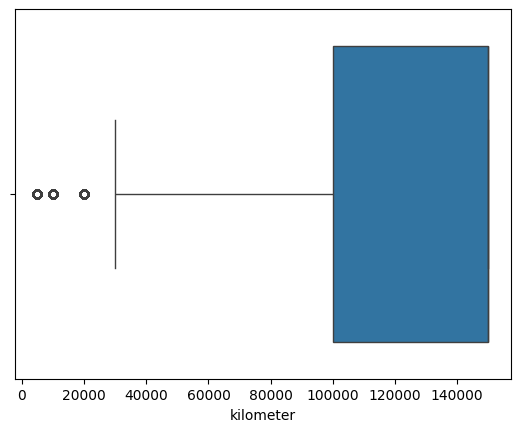

In [68]:
sns.boxplot(x='kilometer', data=df_cleaned);

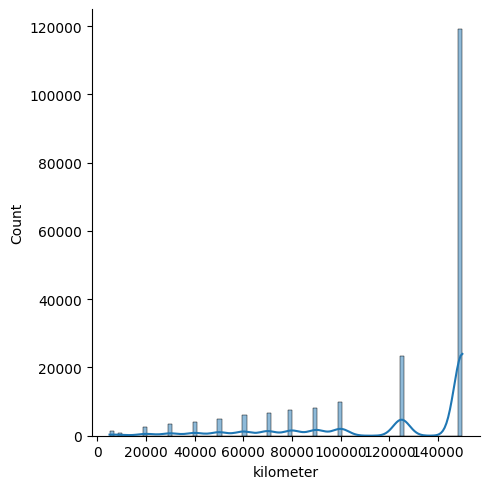

In [69]:
sns.displot(df_cleaned, x='kilometer', kde=True);

- values are normal and acceptable.

In [70]:
df_cleaned.shape

(197717, 16)

In [71]:
# Save dataframe as csv
df_cleaned.to_csv('cleaned_autos.csv', index=False)